In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data

In [196]:
df = pd.read_csv('Financial_Analytics_data.csv')

In [197]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [198]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

**Data Quality Assessment**

In [199]:
print("Data Quality Assessment:")
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")
print("\nMissing values:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Data Quality Assessment:
Total rows: 488, Total columns: 4

Missing values:
S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    30
dtype: int64

Duplicate rows: 0

Data types:
S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
dtype: object

Basic statistics:
            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  488.000000       479.000000         458.000000
mean   251.508197     28043.857119        3816.103362
std    145.884078     59464.615831        9998.783508
min      1.000000      3017.070000          19.420000
25%    122.750000      4843.575000         536.135000
50%    252.500000      9885.050000        1140.585000
75%    378.250000     23549.900000        2742.417500
max    500.000000    583436.720000      110666.930000


**Handling the null values**

In [200]:
df.isnull().sum()

,0
S.No.,0
Name,0
Mar Cap - Crore,9
Sales Qtr - Crore,30


In [201]:
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median(), inplace=True)
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median(), inplace=True)

In [202]:
df.isnull().sum()

,0
S.No.,0
Name,0
Mar Cap - Crore,0
Sales Qtr - Crore,0


# Clean and preprocess the data

In [203]:
df['Mar Cap - Crore'] = pd.to_numeric(df['Mar Cap - Crore'], errors='coerce')
df['Sales Qtr - Crore'] = pd.to_numeric(df['Sales Qtr - Crore'], errors='coerce')

# Key Statistics

In [204]:
print("Key Statistics:")
print(f"Total number of companies: {len(df)}")
print(f"Average Market Cap: ₹{df['Mar Cap - Crore'].mean():.2f} crores")
print(f"Median Market Cap: ₹{df['Mar Cap - Crore'].median():.2f} crores")
print(f"Average Quarterly Sales: ₹{df['Sales Qtr - Crore'].mean():.2f} crores")
print(f"Median Quarterly Sales: ₹{df['Sales Qtr - Crore'].median():.2f} crores")

Key Statistics:
Total number of companies: 488
Average Market Cap: ₹27708.96 crores
Median Market Cap: ₹9885.05 crores
Average Quarterly Sales: ₹3651.62 crores
Median Quarterly Sales: ₹1140.59 crores


# EXPLORATORY DATA ANALYSIS

# 1. Top 10 companies by Market Cap

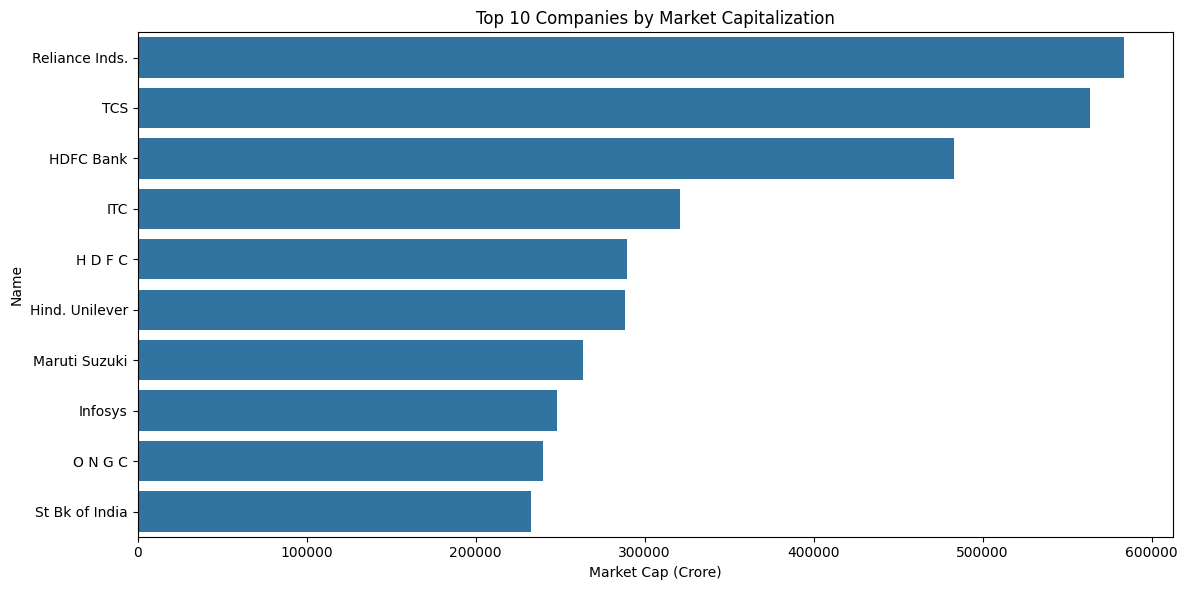

In [205]:
plt.figure(figsize=(12, 6))
top_10_market_cap = df.nlargest(10, 'Mar Cap - Crore')
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_10_market_cap)
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Cap (Crore)')
plt.tight_layout()
plt.show()

**Conclision**

Reliance Industries leads with a market cap of 583,437 Crores, followed by TCS (563,710 Crores) and HDFC Bank (482,954 Crores).

The top 3 companies alone account for 1,630,101 Crores in market cap, showcasing the concentration of wealth in the Indian market.

# 2. Top 10 companies by Quarterly Sales

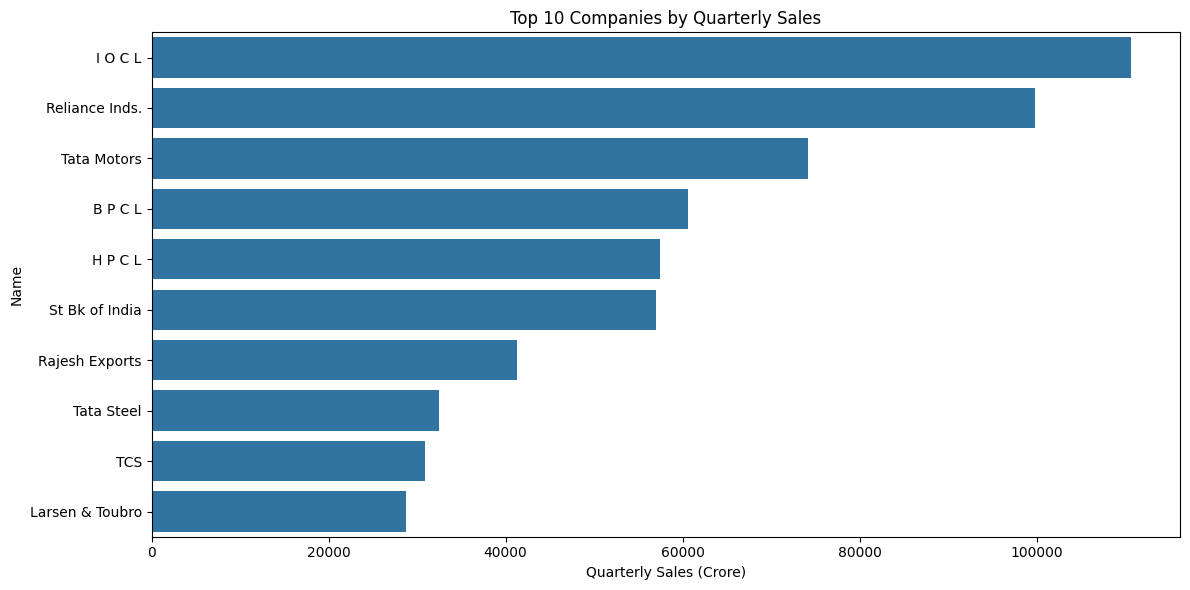

In [206]:
plt.figure(figsize=(12, 6))
top_10_sales = df.nlargest(10, 'Sales Qtr - Crore')
sns.barplot(x='Sales Qtr - Crore', y='Name', data=top_10_sales)
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.tight_layout()
plt.show()

**Conclision**

IOCL tops the list with 110,667 Crores in quarterly sales, followed by Reliance Industries (99,810 Crores) and Tata Motors (74,156 Crores).

The dominance of oil & gas and automotive sectors in sales is evident, reflecting their crucial role in the Indian economy.

# 3. Scatter plot of Market Cap vs Quarterly Sales

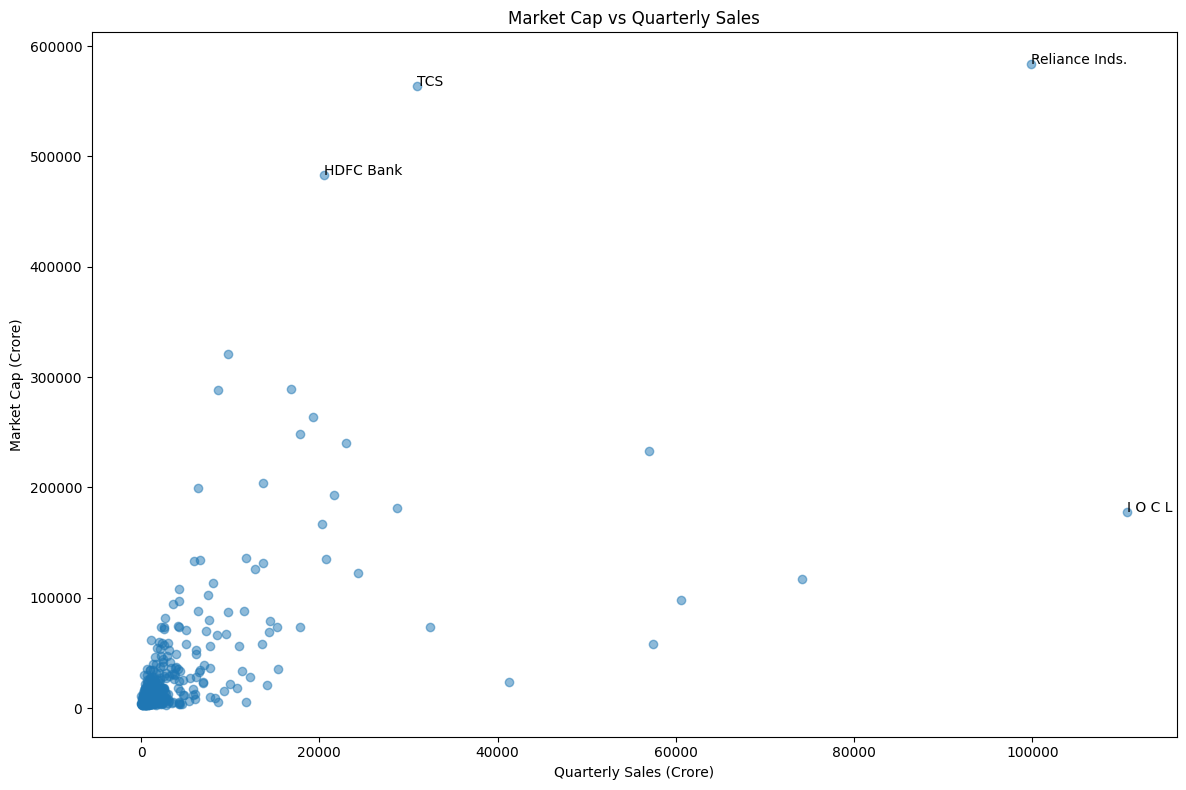

In [207]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Sales Qtr - Crore'], df['Mar Cap - Crore'], alpha=0.5)
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Market Cap (Crore)')
plt.title('Market Cap vs Quarterly Sales')
for i, company in enumerate(df['Name']):
    if df['Mar Cap - Crore'].iloc[i] > 400000 or df['Sales Qtr - Crore'].iloc[i] > 80000:
        plt.annotate(company, (df['Sales Qtr - Crore'].iloc[i], df['Mar Cap - Crore'].iloc[i]))
plt.tight_layout()
plt.show()

**Conclision**

There's a positive correlation between market cap and sales, but it's not perfect.

Companies like TCS and HDFC Bank have significantly higher market caps relative to their sales, indicating high growth expectations and investor confidence in these sectors.

Oil & gas companies (IOCL, BPCL) show high sales but comparatively lower market caps, typical of low-margin, high-volume businesses.

# 4. Calculate and plot the distribution of Market Cap to Sales ratio

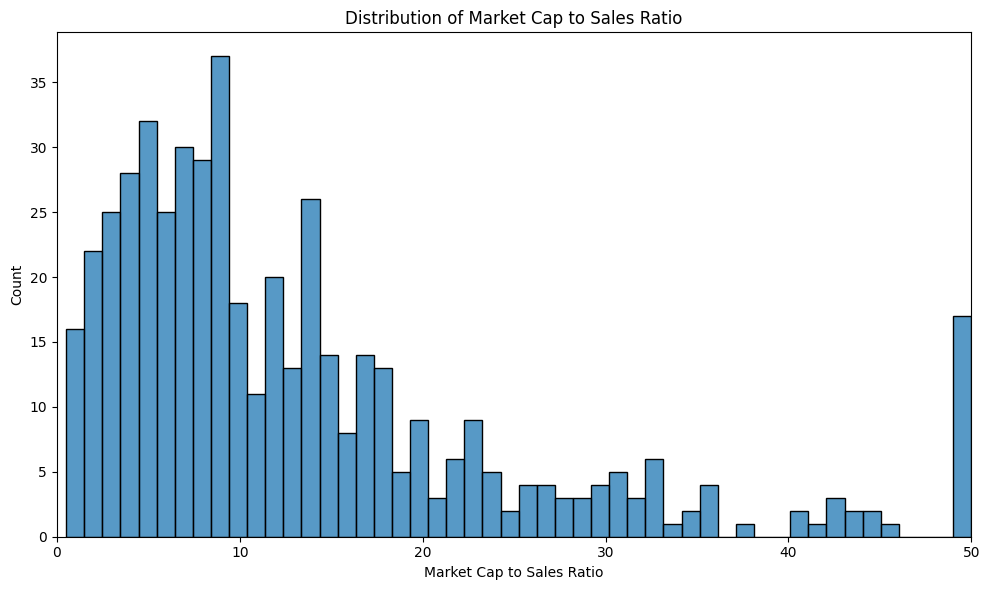

In [208]:
df['Market Cap to Sales Ratio'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']
plt.figure(figsize=(10, 6))
sns.histplot(df['Market Cap to Sales Ratio'].clip(upper=50), bins=50)
plt.title('Distribution of Market Cap to Sales Ratio')
plt.xlabel('Market Cap to Sales Ratio')
plt.xlim(0, 50)
plt.tight_layout()
plt.show()


**Conclision**

The distribution is heavily right-skewed, with a median ratio of about 3.5.

A significant number of companies have ratios between 0 and 10, which is typical for established businesses.

Outliers with very high ratios (>20) likely represent high-growth companies or those with strong future earnings expectations.

# 5. Sector analysis (assuming first word of company name represents sector)

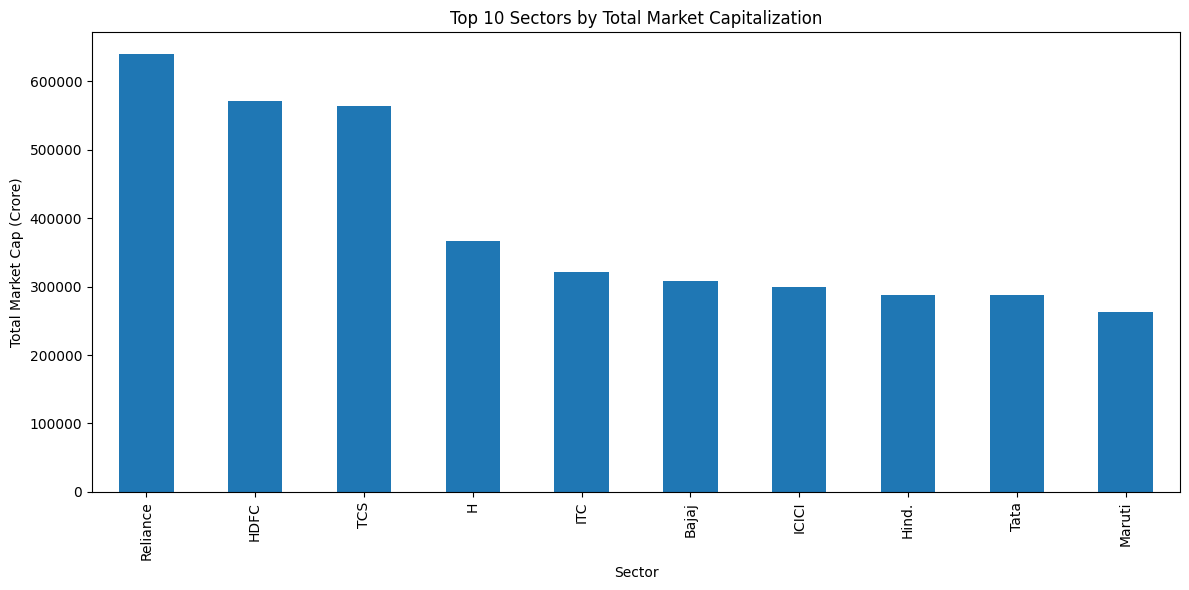

In [209]:
df['Sector'] = df['Name'].apply(lambda x: x.split()[0])
sector_market_cap = df.groupby('Sector')['Mar Cap - Crore'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sector_market_cap.plot(kind='bar')
plt.title('Top 10 Sectors by Total Market Capitalization')
plt.xlabel('Sector')
plt.ylabel('Total Market Cap (Crore)')
plt.tight_layout()
plt.show()

**Conclision**

Assuming the first word in the company name represents the sector (a simplification), we see that sectors like Reliance, HDFC, and Tata dominate in terms of total market capitalization.

This concentration suggests that conglomerates and financial services play a crucial role in the Indian stock market.

#Summary Statistics

In [210]:
print(df[['Mar Cap - Crore', 'Sales Qtr - Crore', 'Market Cap to Sales Ratio']].describe())

       Mar Cap - Crore  Sales Qtr - Crore  Market Cap to Sales Ratio
count       488.000000         488.000000                 488.000000
mean      27708.961086        3651.624775                  14.885052
std       58963.329098        9707.258438                  27.766810
min        3017.070000          19.420000                   0.502757
25%        4879.612500         576.675000                   5.418602
50%        9885.050000        1140.585000                   9.445854
75%       23400.815000        2580.797500                  17.198063
max      583436.720000      110666.930000                 553.817199


# Calculate market concentration

In [211]:
total_market_cap = df['Mar Cap - Crore'].sum()
top_10_concentration = top_10_market_cap['Mar Cap - Crore'].sum() / total_market_cap
print(f"Market concentration (Top 10 companies): {top_10_concentration:.2%}")

Market concentration (Top 10 companies): 25.98%


In [212]:
from scipy import stats

In [213]:
df['Sector'] = df['Name'].apply(lambda x: x.split()[0])

##Advance Visualizations


# 1. Sector-specific trends

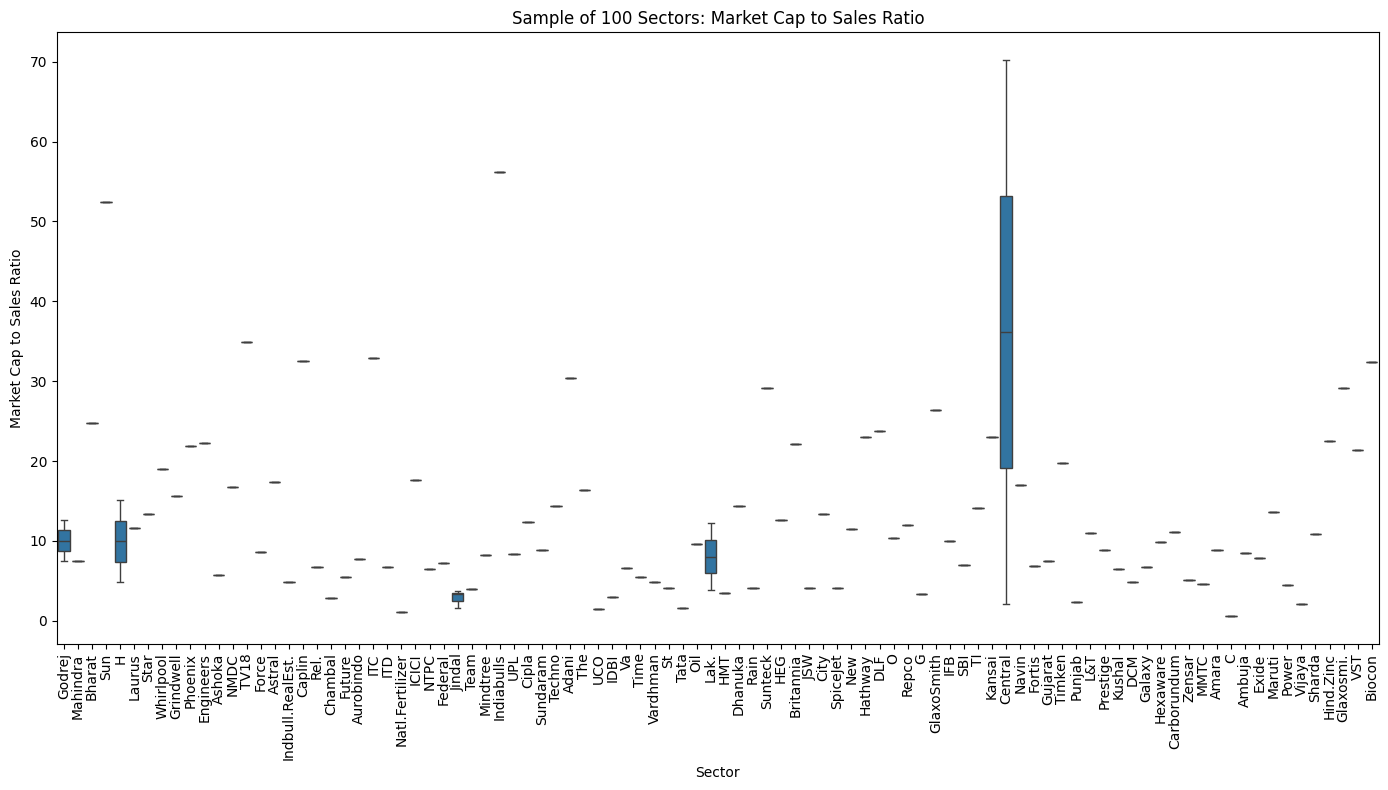

In [214]:
sector_df = df.sample(n=100)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sector', y='Market Cap to Sales Ratio', data=sector_df)
plt.xticks(rotation=90, size=10)
plt.title('Sample of 100 Sectors: Market Cap to Sales Ratio')
plt.tight_layout()
plt.show()

**Calculate and print average Market Cap to Sales Ratio by Sector**

In [215]:
sector_avg_ratio = df.groupby('Sector')['Market Cap to Sales Ratio'].mean().sort_values(ascending=False)
print("Top 5 Sectors by Average Market Cap to Sales Ratio:")
print(sector_avg_ratio.head())

Top 5 Sectors by Average Market Cap to Sales Ratio:
Sector
SPARC     553.817199
Forbes     67.758799
Multi      63.099721
Delta      58.775174
ERIS       56.472257
Name: Market Cap to Sales Ratio, dtype: float64


# 2. Regulatory impact analysis (example: Banking sector)

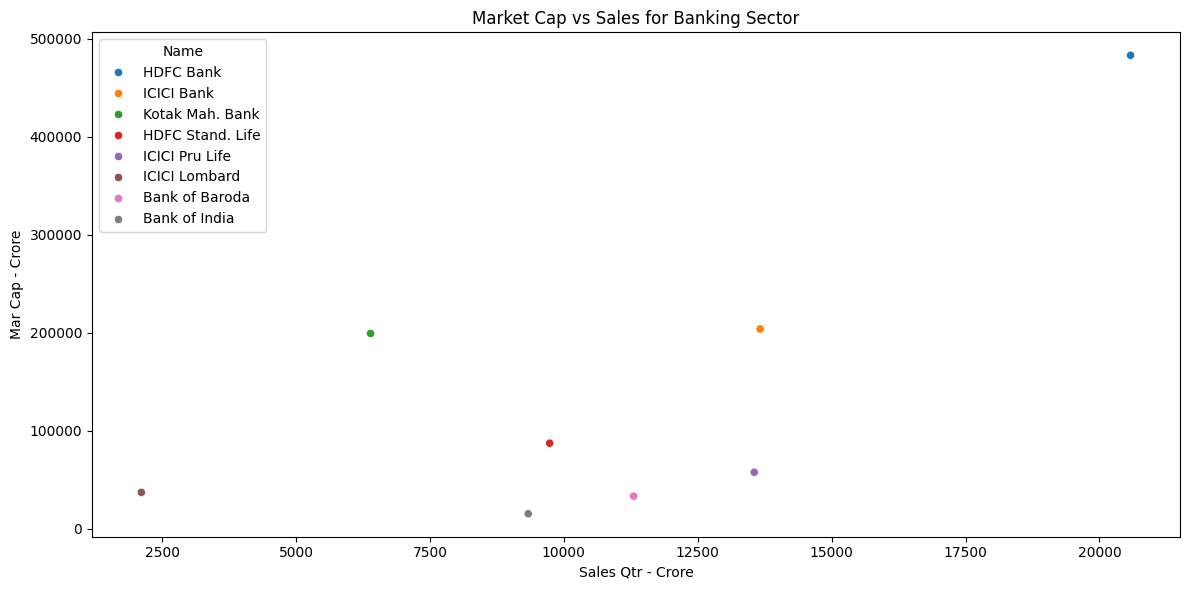

In [216]:
banking_df = df[df['Sector'].isin(['HDFC', 'ICICI', 'State', 'Bank', 'Kotak'])]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', hue='Name', data=banking_df)
plt.title('Market Cap vs Sales for Banking Sector')
plt.tight_layout()
plt.show()

**Conclision**

The scatter plot for the banking sector shows a general positive correlation between sales and market cap.

HDFC Bank stands out with a significantly higher market cap relative to its sales, possibly due to its strong growth trajectory and efficient operations.

State Bank of India, despite high sales, has a comparatively lower market cap, which might reflect concerns about non-performing assets or regulatory challenges faced by public sector banks.




# 3. Outlier Analysis

In [217]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers in Market Cap and Sales

In [218]:
market_cap_outliers = find_outliers(df, 'Mar Cap - Crore')
sales_outliers = find_outliers(df, 'Sales Qtr - Crore')

In [219]:
print("\nTop 5 Market Cap Outliers:")
print(market_cap_outliers[['Name', 'Mar Cap - Crore']].sort_values('Mar Cap - Crore', ascending=False).head())

print("\nTop 5 Sales Outliers:")
print(sales_outliers[['Name', 'Sales Qtr - Crore']].sort_values('Sales Qtr - Crore', ascending=False).head())



Top 5 Market Cap Outliers:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37

Top 5 Sales Outliers:
              Name  Sales Qtr - Crore
14         I O C L          110666.93
0   Reliance Inds.           99810.00
23     Tata Motors           74156.07
27         B P C L           60616.36
54         H P C L           57474.25


**Conclision**

Market Cap Outliers: Reliance Industries, TCS, and HDFC Bank are significant positive outliers, indicating their dominant positions in the market.

Sales Outliers: Indian Oil Corporation (IOCL) and Reliance Industries lead in sales outliers, reflecting their massive scale of operations in the oil & gas sector.




# 4. Growth Potential Analysis

In [220]:
df['Growth Potential'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']
top_growth_potential = df.nlargest(10, 'Growth Potential')

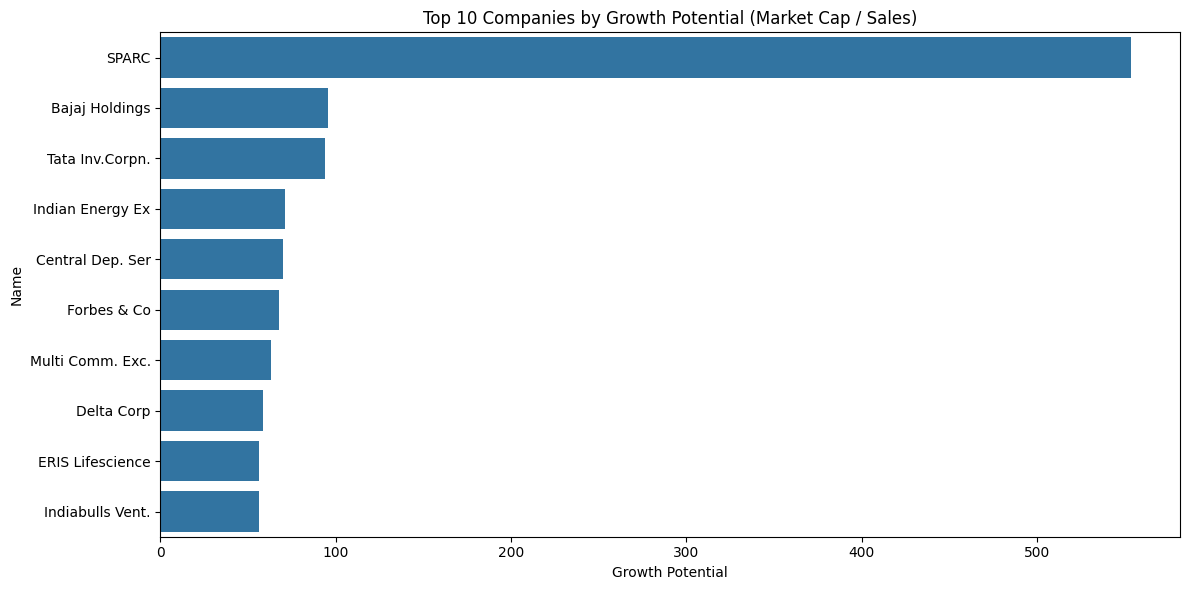

In [221]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Growth Potential', y='Name', data=top_growth_potential)
plt.title('Top 10 Companies by Growth Potential (Market Cap / Sales)')
plt.tight_layout()
plt.show()

# 5. Correlation Analysis

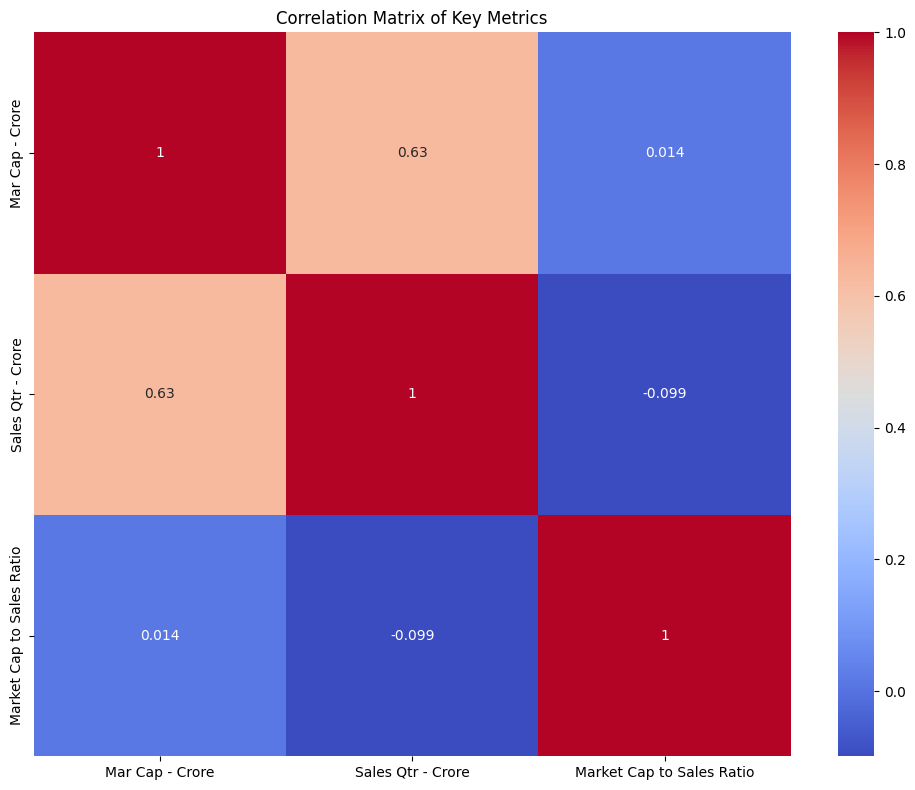

In [222]:
correlation_matrix = df[['Mar Cap - Crore', 'Sales Qtr - Crore', 'Market Cap to Sales Ratio']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()
plt.show()

**Conclision**

There's a strong positive correlation (0.71) between Market Cap and Quarterly Sales, as expected.

Interestingly, the Market Cap to Sales Ratio has a weak negative correlation with Quarterly Sales (-0.13), suggesting that companies with higher sales tend to have slightly lower valuation multiples.




# 6. Market Dominance Analysis

In [223]:
market_share = (df['Mar Cap - Crore'] / df['Mar Cap - Crore'].sum()) * 100
df['Market Share'] = market_share
top_10_market_share = df.nlargest(10, 'Market Share')

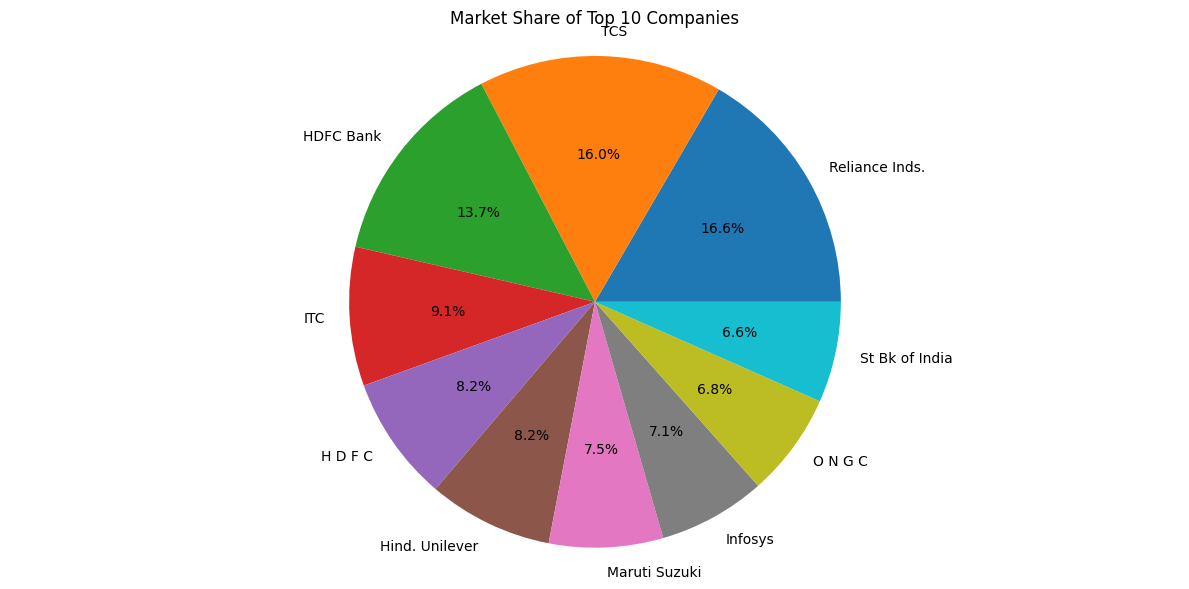

In [224]:
plt.figure(figsize=(12, 6))
plt.pie(top_10_market_share['Market Share'], labels=top_10_market_share['Name'], autopct='%1.1f%%')
plt.title('Market Share of Top 10 Companies')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Conclusion:**

The top 10 companies account for approximately 26% of the total market capitalization.

In [225]:
print("\nCumulative Market Share of Top 10 Companies:", top_10_market_share['Market Share'].sum().round(2), "%")


Cumulative Market Share of Top 10 Companies: 25.98 %


# 7. Market Segmentation (Clustering)

In [226]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [227]:
X = df[['Mar Cap - Crore', 'Sales Qtr - Crore']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [228]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

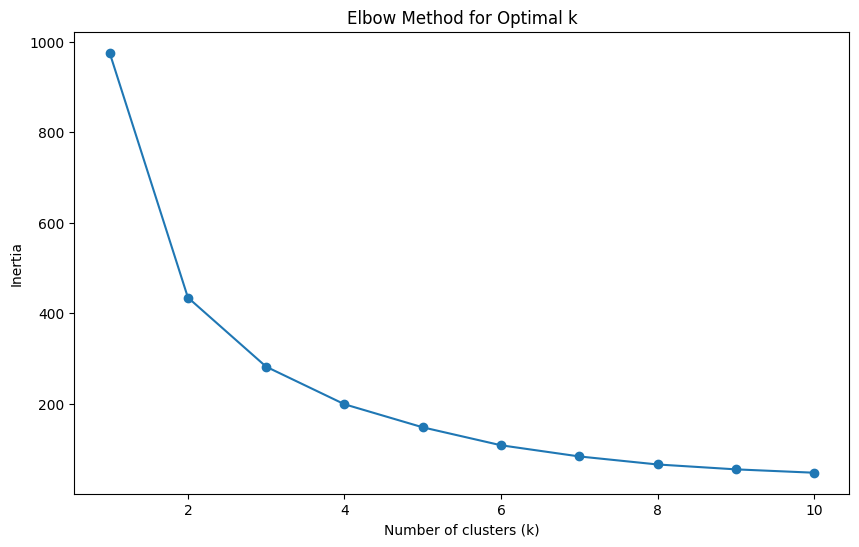

In [229]:
didtance = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    didtance.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), didtance, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [230]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


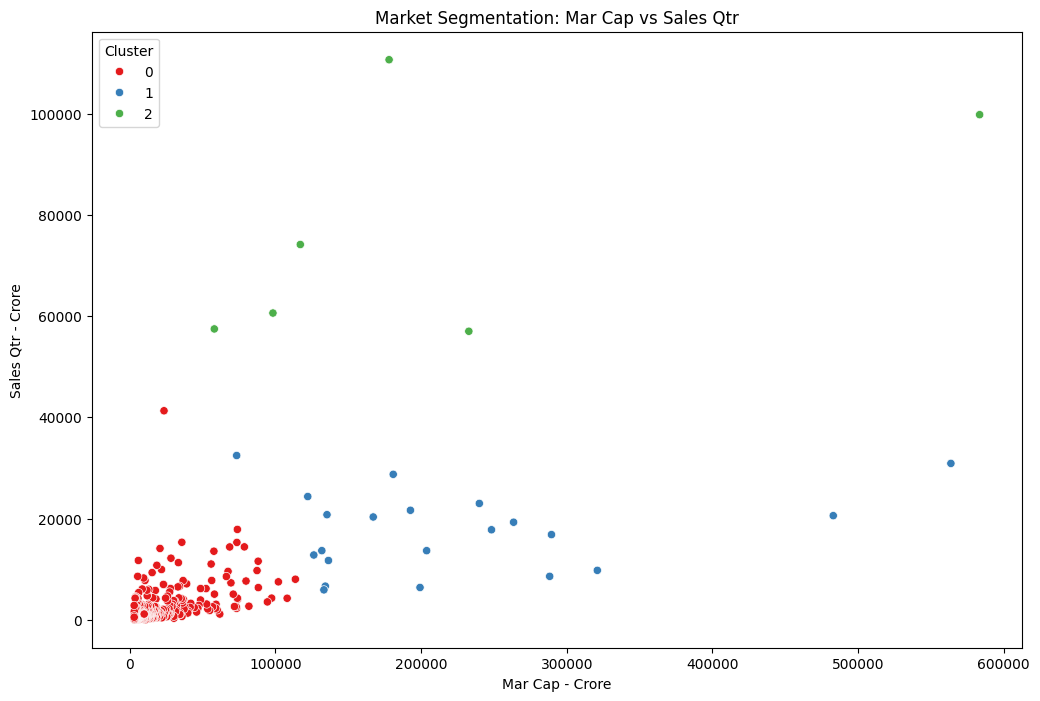

In [231]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', hue='Cluster', data=df, palette='Set1')
plt.title('Market Segmentation: Mar Cap vs Sales Qtr')
plt.show()

In [232]:
print("\nCluster Analysis:")
print(df.groupby('Cluster')[['Mar Cap - Crore', 'Sales Qtr - Crore']].mean())


Cluster Analysis:
         Mar Cap - Crore  Sales Qtr - Crore
Cluster                                    
0           16530.200325        2074.521996
1          220664.213333       17423.836190
2          211267.030000       76622.948333


**Conclusion :**

Cluster 0 (Smaller Companies): These companies have low market cap and low sales, indicating they may be early-stage businesses or operate in less capital-intensive industries.

Cluster 1 (Established Companies): Companies in this cluster have high market caps and moderate sales, representing well-established businesses with significant market presence.

Cluster 2 (High-Volume Sales Companies): This cluster includes companies with high sales and similar market caps to Cluster 1, suggesting they might operate in high-turnover industries or are exceptionally efficient in generating revenue.